In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

In [101]:
# Reading the data:
#=======================================================================================

def read_data():
    train_data = pd.read_csv("train.csv")
    print("Train data imported successfully!!")
    print("-"*50)
    test_data = pd.read_csv("test.csv")
    print("Test data imported successfully!!")
    return train_data , test_data

train_data , test_data = read_data()
combine = [train_data , test_data]

#=======================================================================================

Train data imported successfully!!
--------------------------------------------------
Test data imported successfully!!


In [102]:
# Discovering the features types:
#=======================================================================================

train_data.info()
print('_'*40 , '\n')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

In [103]:
# Discovering the missed values:
#=======================================================================================

print("Train data missed values:\n")
print(train_data.isnull().sum())
print('\n','_'*40 , '\n')
print("Test data missed values:")
print(test_data.isnull().sum())

Train data missed values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 ________________________________________ 

Test data missed values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [104]:
# Discovering the categorical data distribution :
#=======================================================================================

train_data.describe(include='all')

# include can take 'object': returns description of string / object columns
#                  'number': returns description of numeric columans
#                  'all': returns description of all columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


died        549
survived    342
Name: Survived, dtype: int64


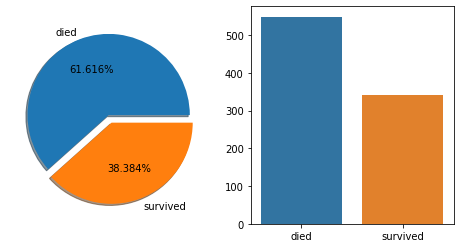

In [105]:
# Count of survived
# ===================================================================
# defines figure and axes
f,ax=plt.subplots(1,2,figsize=(8,4))
# gets value counts for died and survived and relabels
plot_survived = train_data['Survived'].replace({0:"died",1:"survived"}).value_counts()
print(plot_survived)
# plots pie chart of survived data as percentage with a bit of shadow .# gives number of decimal places
plot_survived.plot.pie(explode=[0,0.1],autopct='%1.3f%%',ax=ax[0],shadow=True)
# sets y label to nowt
ax[0].set_ylabel('')
# countplot of survived variable with relabelling directly and removal of 
sns.countplot(x = train_data["Survived"].replace({0:"died",1:"survived"}) , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

In [106]:
# Helper functions:
def survived_bar_plot(feature):
    plt.figure(figsize = (6,4))
    # plots survived vs feature - takes mean value / sets title to the feature Vs Survived
    sns.barplot(data = train_data , x = feature , y = "Survived").set_title(f"{feature} Vs Survived")
    plt.show()
    
def survived_table(feature):
    # selects feature and survived column, then takes mean of survived grouping by feature
    # removes the index from the table, then sorts calculated values
    return train_data[[feature, "Survived"]].groupby([feature], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.2,high=0.8)

def survived_hist_plot(feature, binwidth):
    plt.figure(figsize = (6,4))
    # selects train data and feature and default binwidth = 5 (could change this)
    # stacks the proportions on top of each other which is cool
    sns.histplot(data = train_data , x = feature , hue = "Survived",binwidth=binwidth
                 ,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{feature} Vs Survived")
    plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

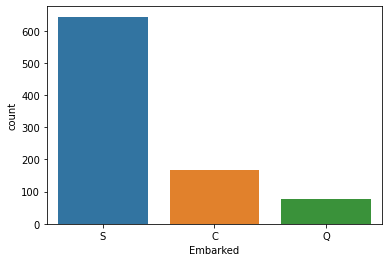

In [107]:
sns.countplot(data = train_data, x='Embarked')

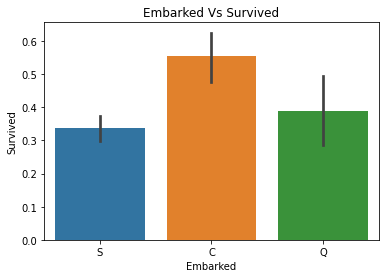

In [108]:
survived_bar_plot("Embarked")

In [109]:
survived_table("Sex")

,Sex,Survived
0,female,0.742038
1,male,0.188908


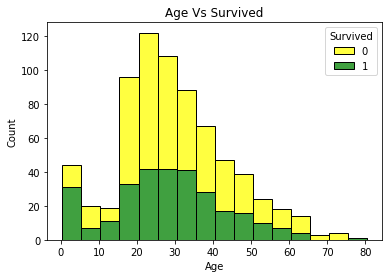

In [110]:
survived_hist_plot("Age", 5)

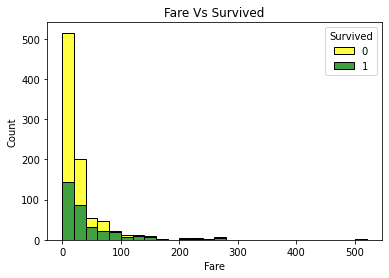

In [111]:
survived_hist_plot("Fare", 20)

In [112]:
let = ['A','A', 'B', 'C', 'D', 'Z']
max(let)

'Z'

In [113]:
train_data.Embarked.dropna()

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [114]:
# takes na values in embarked and replaces with the last available value, which could be improved by taking the most
# common values. Replace inplace
train_data.Embarked.fillna(train_data.Embarked.dropna().max(), inplace=True)
# encode the embarked column and set datatype as integer
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int)

In [115]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)  

In [116]:
# replaces ages
# set up log to be stored with ages over different sexes and classes
guess_ages = np.zeros((2,3))

# do this over both datasets which is smart - lists of different 
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            # cycle through classes and sex and take the ages of those people
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            # take the median values of the list
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    
    
    for i in range(0, 2):
        for j in range(0, 3):
            # replace null locations of age and over the different sexes and pclass and replace the value with the
            # corresponding guesses
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
    # convert age column to integer
    dataset['Age'] = dataset['Age'].astype(int)
    

In [117]:
test_data.Fare.fillna(test_data.Fare.dropna().median() , inplace= True)

In [118]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand']
                                            , as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [119]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 5

In [120]:
train_data.Age.describe()

count    891.000000
mean       1.334456
std        0.866565
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Age, dtype: float64

In [121]:
train_data.drop(['AgeBand'], axis=1 , inplace = True)

In [122]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0


In [123]:
# splits data up into quartiles
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand']
                                             , as_index=False).mean().sort_values(by='FareBand', ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [124]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data.drop(['FareBand'], axis=1 , inplace = True)

In [125]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data.drop(['Parch', 'SibSp'], axis=1 , inplace = True)
test_data.drop(['Parch', 'SibSp'], axis=1 , inplace = True)    

train_data[['FamilySize', 'Survived']].groupby(['FamilySize']
                                               , as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [126]:
for dataset in combine:
    dataset['Single'] = dataset['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    dataset['SmallF'] = dataset['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    dataset['MedF'] = dataset['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
    
train_data.drop(columns = ["FamilySize"] , inplace = True)
test_data.drop(columns = ["FamilySize"] , inplace = True)

In [127]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Single,SmallF,MedF,LargeF
0,1,0,3,"Braund, Mr. Owen Harris",0,1,A/5 21171,0,NaN,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,PC 17599,3,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,STON/O2. 3101282,1,NaN,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,113803,3,C123,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,2,373450,1,NaN,0,1,0,0,0


In [128]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [129]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [130]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [131]:
train_data.drop(['Name'], axis=1 , inplace = True)
test_data.drop(['Name'], axis=1 , inplace = True)

In [139]:
train_data.drop(['Ticket','Cabin'], axis=1 , inplace = True)
test_data.drop(['Ticket','Cabin'], axis=1 , inplace = True)

In [141]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Single,SmallF,MedF,LargeF,Title
0,1,0,3,0,1,0,0,0,1,0,0,1
1,2,1,1,1,2,3,1,0,1,0,0,3
2,3,1,3,1,1,1,0,1,0,0,0,2
3,4,1,1,1,2,3,0,0,1,0,0,3
4,5,0,3,0,2,1,0,1,0,0,0,1


In [133]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [143]:
# Preparing Data For Training:
# ==================================================================================

Y_train = train_data["Survived"]
X_train = train_data.drop(labels = ["Survived","PassengerId"],axis = 1)
Test = test_data.drop(labels = ["PassengerId"],axis = 1)
print(f"X_train shape is = {X_train.shape}" )
print(f"Y_train shape is = {Y_train.shape}" )
print(f"Test shape is = {Test.shape}" )

X_train shape is = (891, 10)
Y_train shape is = (891,)
Test shape is = (418, 10)


In [144]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

/Users/alexanderwade-smith/miniforge3/envs/.venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/alexanderwade-smith/miniforge3/envs/.venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be e

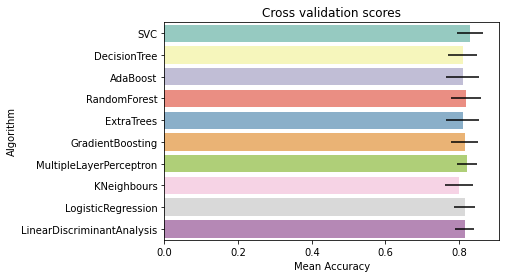

In [146]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighbours","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [172]:
cv_results

[array([0.83333333, 0.87640449, 0.76404494, 0.87640449, 0.83146067,
        0.79775281, 0.82022472, 0.78651685, 0.86516854, 0.84269663]),
 array([0.76666667, 0.84269663, 0.73033708, 0.83146067, 0.84269663,
        0.78651685, 0.84269663, 0.7752809 , 0.84269663, 0.83146067]),
 array([0.76666667, 0.84269663, 0.73033708, 0.80898876, 0.84269663,
        0.78651685, 0.84269663, 0.75280899, 0.87640449, 0.84269663]),
 array([0.78888889, 0.84269663, 0.73033708, 0.83146067, 0.84269663,
        0.83146067, 0.85393258, 0.76404494, 0.85393258, 0.84269663]),
 array([0.77777778, 0.85393258, 0.71910112, 0.80898876, 0.84269663,
        0.78651685, 0.84269663, 0.76404494, 0.85393258, 0.84269663]),
 array([0.81111111, 0.84269663, 0.74157303, 0.85393258, 0.84269663,
        0.79775281, 0.79775281, 0.76404494, 0.84269663, 0.85393258]),
 array([0.82222222, 0.85393258, 0.75280899, 0.85393258, 0.84269663,
        0.79775281, 0.83146067, 0.82022472, 0.82022472, 0.82022472]),
 array([0.73333333, 0.84269663, 0.

In [147]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


0.8126092384519351

In [148]:
print(ada_best)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   learning_rate=0.0001, n_estimators=1, random_state=7)


In [149]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8294257178526842

In [150]:
print(ExtC_best)

ExtraTreesClassifier(max_features=3, min_samples_leaf=10)


In [154]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True],
              "n_estimators" :[100,300],
              "criterion": ["gini", "entropy"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


0.8339200998751559

In [155]:
print(RFC_best)

RandomForestClassifier(criterion='entropy', max_features=3, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=300)


In [157]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["log_loss"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8238077403245943

In [170]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.8316479400749064

In [171]:
np.linspace(.1, 1.0, 5)

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

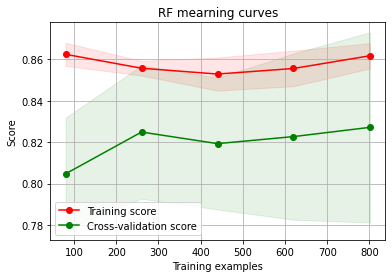

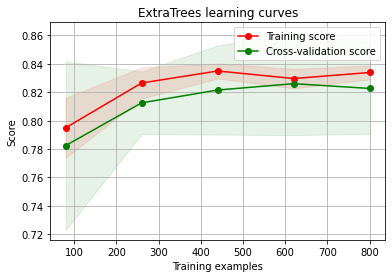

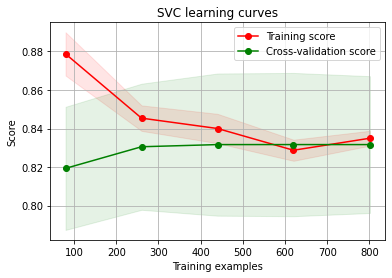

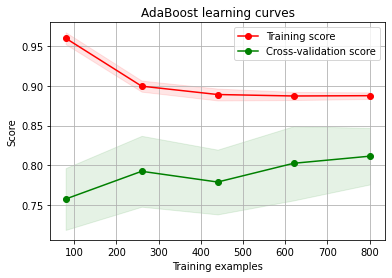

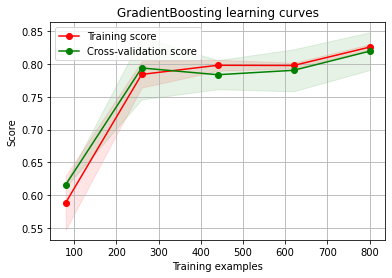

In [159]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)


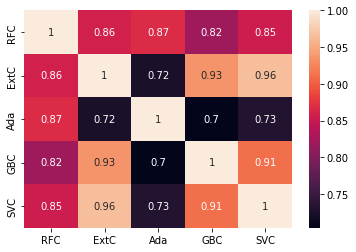

In [160]:
test_Survived_RFC = pd.Series(RFC_best.predict(Test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(Test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(Test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(Test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(Test), name="GBC")



# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

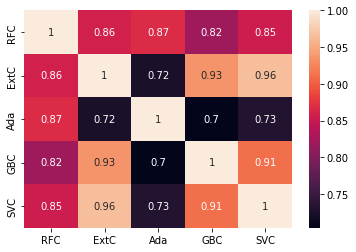

In [161]:
# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [162]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [164]:
test_Survived = pd.Series(votingC.predict(Test), name="Survived")

results = pd.concat([test_data.PassengerId,test_Survived],axis=1)

results.to_csv("ensemble_kaggle.csv",index=False)